#### `tf.Module` and it's uses in Keras

In [1]:
import tensorflow as tf

In [4]:
class Dense(tf.Module):
  def __init__(self, in_features, out_features, name=None):
    super().__init__(name=name)
    self.w = tf.Variable(
      tf.random.normal([in_features, out_features]), name='w')
    self.b = tf.Variable(tf.zeros([out_features]), name='b')
  def __call__(self, x):
    y = tf.matmul(x, self.w) + self.b
    return tf.nn.relu(y)

In [6]:
class SequentialModule(tf.Module):
  def __init__(self, name=None):
    super().__init__(name=name)

    self.dense_1 = Dense(in_features=3, out_features=3)
    self.dense_2 = Dense(in_features=3, out_features=2)

  @tf.function
  def __call__(self, x):
    x = self.dense_1(x)
    return self.dense_2(x)

# You have made a model!
my_model = SequentialModule(name="the_model")

In [12]:
# Call it, with random results
%timeit -n 1000 "Model results:", my_model(tf.constant([[2.0, 2.0, 2.0]]))

119 µs ± 5.32 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [13]:
tf.config.run_functions_eagerly(True)

In [14]:
# Call it, with random results
%timeit -n 1000 "Model results:", my_model(tf.constant([[2.0, 2.0, 2.0]]))

824 µs ± 3.77 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [36]:
x = tf.random.normal([1000], stddev=2.)

In [37]:
x

<tf.Tensor: shape=(1000,), dtype=float32, numpy=
array([ 1.59660578e-01,  5.60491025e-01,  8.76550257e-01,  2.59911799e+00,
       -1.78671956e-01,  3.51816392e+00, -1.90282071e+00, -7.50882447e-01,
        2.99934936e+00, -3.94943535e-01,  4.94904757e+00, -3.31912339e-01,
       -3.83675981e+00, -4.75984484e-01,  6.47699296e-01, -8.43754470e-01,
       -2.32134628e+00,  3.36182594e+00, -1.17426085e+00,  2.09082648e-01,
       -2.47613358e+00, -4.59682435e-01,  1.56927228e+00, -1.76451802e+00,
       -9.23134908e-02,  2.77423429e+00,  1.72270751e+00, -8.80961657e-01,
       -5.16807079e-01,  1.46088219e+00, -5.12837172e+00, -9.96767402e-01,
        1.57775891e+00, -3.04232359e+00, -6.81904435e-01,  2.57931620e-01,
        1.39137232e+00,  6.62185192e-01,  7.40181625e-01,  1.09027378e-01,
       -2.98790646e+00, -1.74799323e+00, -2.39285469e-01, -2.12747574e+00,
        2.19905853e+00, -8.80381837e-02,  8.70869875e-01, -3.15630627e+00,
        5.77076912e-01, -2.16311410e-01, -3.0283150

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.],
       dtype=float32),
 <a list of 1000 BarContainer objects>)

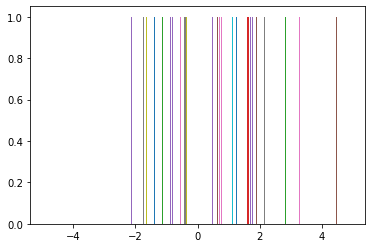

In [38]:
# Plot all the data
import matplotlib.pyplot as plt

plt.hist(x, bins=10, range=(-5, 5))